## Isolation Forest Anomaly Detection

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Healthcare Data.csv')

In [3]:
df.head()

,0,1
0,1.616671,1.944522
1,1.256461,1.609444
2,-2.343919,4.392961
3,1.195393,2.794485
4,-3.329586,5.303160


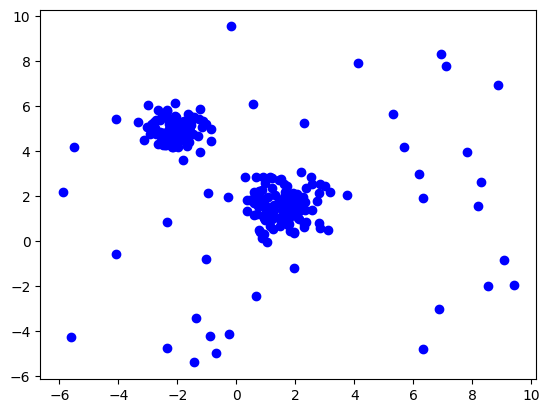

In [4]:
plt.scatter(df.iloc[:,0], df.iloc[:,1], c='blue')

In [5]:
from sklearn.ensemble import IsolationForest

In [6]:
clf = IsolationForest(contamination=0.2)

In [7]:
clf.fit(df)

IsolationForest(contamination=0.2)

In [8]:
pred = clf.predict(df)

In [9]:
pred

array([ 1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1, -1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1, -1, -1,  1,
        1,  1, -1,  1, -1,  1,  1,  1,  1,  1, -1,  1, -1,  1,  1,  1, -1,
        1,  1,  1,  1, -1,  1, -1,  1,  1,  1, -1,  1,  1,  1,  1, -1,  1,
       -1,  1, -1,  1,  1,  1,  1, -1,  1,  1,  1,  1, -1,  1,  1,  1,  1,
        1,  1, -1,  1,  1,  1, -1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,
       -1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1, -1,  1, -1, -1,  1,  1,
        1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,
        1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1, -1, -1,  1,  1,
        1,  1,  1,  1,  1,  1,  1, -1,  1, -1,  1, -1, -1,  1,  1,  1,  1,
       -1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1, -1,  1,  1,  1,  1,
       -1,  1,  1,  1,  1, -1,  1,  1, -1,  1, -1,  1,  1, -1,  1,  1, -1,
       -1,  1,  1,  1,  1

In [10]:
abn_idx = np.where(pred==-1)

In [11]:
abn_idx

(array([  4,  20,  24,  45,  48,  49,  53,  55,  61,  63,  67,  72,  74,
         78,  83,  85,  87,  92,  97, 104, 108, 114, 119, 126, 130, 132,
        133, 141, 151, 160, 166, 167, 177, 179, 181, 182, 187, 197, 199,
        204, 209, 212, 214, 217, 220, 221, 227, 242, 247, 248]),)

In [12]:
X = df.values

In [13]:
X

array([[ 1.61667145,  1.94452201],
       [ 1.2564615 ,  1.60944428],
       [-2.34391881,  4.3929613 ],
       [ 1.19539251,  2.79448461],
       [-3.32958612,  5.30315976],
       [ 1.6241983 ,  1.21875334],
       [ 0.45611969,  1.80757419],
       [ 0.62304325,  2.04424325],
       [-2.05908202,  4.6599109 ],
       [ 2.16307638,  1.39149293],
       [-2.13386677,  4.43599433],
       [-1.65311342,  4.92021328],
       [ 0.75047316,  2.23811621],
       [-1.71073925,  5.17482723],
       [ 0.86102444,  2.2819114 ],
       [-1.86274182,  4.55454246],
       [ 1.48027244,  1.79983231],
       [ 1.45223088,  2.69933991],
       [-1.65509092,  5.65092311],
       [ 1.22887123,  1.28838807],
       [ 9.39915672, -1.97148327],
       [ 2.04025339,  2.07645291],
       [ 0.890442  ,  1.09480523],
       [-2.35235014,  5.47163036],
       [ 0.56612677,  6.08881822],
       [-2.38207196,  4.28110426],
       [-2.57809122,  5.39059905],
       [-1.92902342,  4.84033579],
       [-2.40668213,

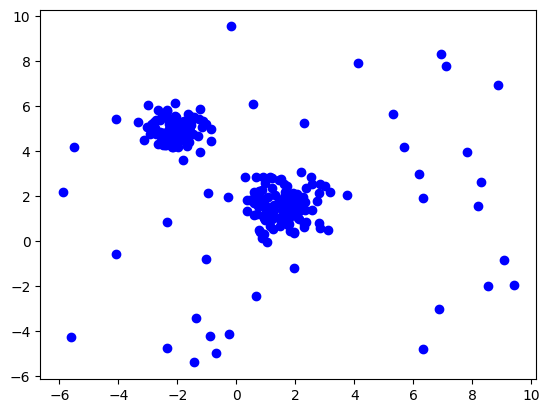

In [14]:
plt.scatter(X[:,0], X[:,1], c='blue')

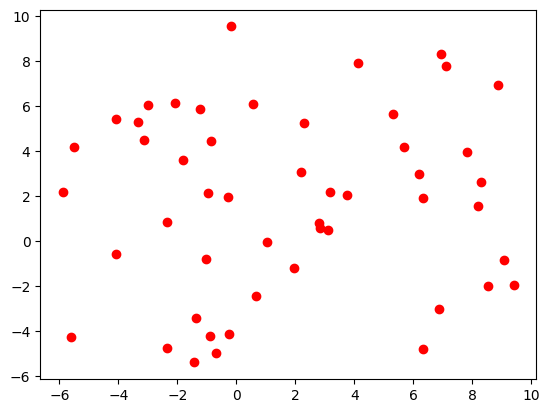

In [15]:
plt.scatter(X[abn_idx,0], X[abn_idx,1], c='red')

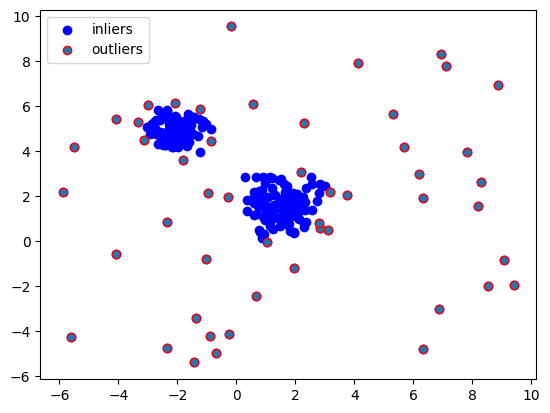

In [16]:
plt.scatter(X[:,0], X[:,1], c='blue')
plt.scatter(X[abn_idx,0], X[abn_idx,1], edgecolors='red')
plt.legend(["inliers", "outliers"])

In [17]:
from sklearn.inspection import DecisionBoundaryDisplay

/Users/dhruvsmac/Desktop/development/machine learning/.venv/lib/python3.12/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


(-6.888765911500949,
 10.399156719073778,
 -6.409808842327475,
 10.878113788247251)

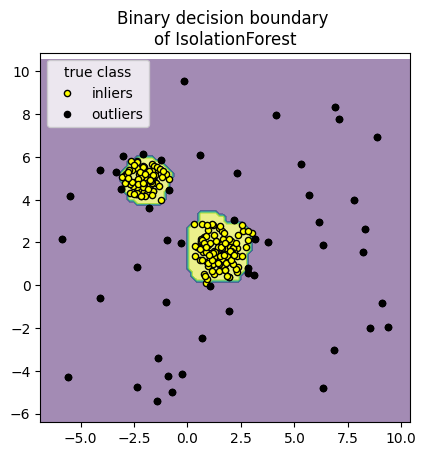

In [18]:
disp = DecisionBoundaryDisplay.from_estimator(clf, X, response_method="predict", alpha=0.5)
disp.ax_.scatter(X[:,0], X[:,1], c='yellow', edgecolors='black', s=20)
disp.ax_.scatter(X[abn_idx,0], X[abn_idx,1], c='black', s=20)
disp.ax_.set_title("Binary decision boundary \nof IsolationForest")
plt.legend(["inliers", "outliers"], title="true class")
plt.axis("square")

/Users/dhruvsmac/Desktop/development/machine learning/.venv/lib/python3.12/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


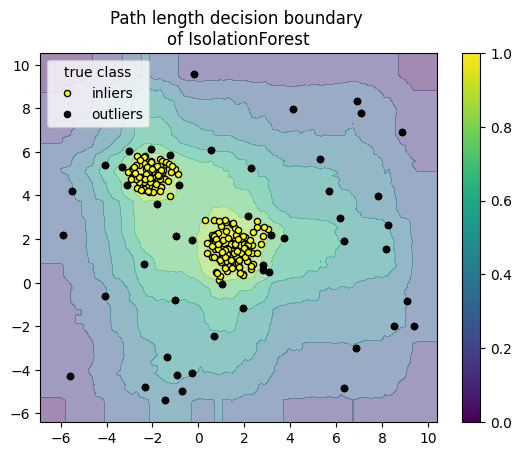

In [19]:
disp = DecisionBoundaryDisplay.from_estimator(clf, X, response_method="decision_function", alpha=0.5)
disp.ax_.scatter(X[:,0], X[:,1], c='yellow', edgecolors='black', s=20)
disp.ax_.scatter(X[abn_idx,0], X[abn_idx,1], c='black', s=20)
disp.ax_.set_title("Path length decision boundary \nof IsolationForest")
plt.legend(["inliers", "outliers"], title="true class")
plt.colorbar(disp.ax_.collections[1])
plt.show()